In [781]:
# IMPORTS
# Libraries for data processing
import pandas as pd
import numpy as np

# Visualisation libraries (required for PHASE 2)
import seaborn as sns
import matplotlib.pyplot as plt

# Library for null imputation
from sklearn.impute import SimpleImputer


# To display all columns correctly
pd.set_option('display.max_columns', None)

# Phase 1: Exploratory Data Analysis (EDA).

In [710]:
# Data reading (CSV file)
df_employees = pd.read_csv('Files/HR RAW DATA.csv')

# Reading the first 5 rows
df_employees.head(5)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [711]:
# Reading 10 random rows
df_employees.sample(10)


,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1130,1130,58,No,travel_frequently,"1216,0$",Research & Development,15,4,Life Sciences,1,"1837,0",1,0,87,3,4,reseaRch DIrecTOr,3,Married,NaN,21624,2,NaN,NaN,14,"3,0",2,NaN,0,"23,0",3,"3,0",2,NaN,2,2,NaN,1965,1000000000$,reseaRch DIrecTOr - Research & Development,NaN,Yes
1604,1604,41,Yes,NaN,"1085,0$",Research & Development,2,4,Life Sciences,1,"927,0",2,1,Not Available,1,1,LAbORAToRy tEcHNICian,4,divorced,NaN,17725,4,NaN,Yes,13,"3,0",3,"80,0",1,NaN,1,"2,0",7,NaN,1,0,NaN,1982,1000000000$,LAbORAToRy tEcHNICian - Research & Developm...,NaN,Yes
686,686,53,No,NaN,"1070,0$",NaN,3,4,NaN,1,"386,0",3,0,45,3,4,ResEaRCH DIREcTOr,3,Married,"17584,0",21016,3,NaN,Yes,16,"3,0",4,NaN,3,"21,0",5,"2,0",5,NaN,1,3,"17584,0",1970,1000000000$,NaN,NaN,1
668,668,59,No,travel_frequently,"1225,0$",NaN,1,1,NaN,1,"91,0",1,1,57,2,2,SalEs EXecuTiVE,3,Single,"5473,0",24668,7,Y,No,11,NaN,4,"80,0",0,"20,0",2,"2,0",4,NaN,1,3,"5473,0",1964,1000000000$,NaN,NaN,False
742,742,56,No,travel_rarely,"206,0$",NaN,8,4,Life Sciences,1,"1338,0",4,0,99,3,5,maNaGEr,2,Single,NaN,4022,6,NaN,No,14,"3,0",1,NaN,0,"36,0",4,"3,0",7,NaN,7,7,NaN,1967,1000000000$,NaN,NaN,0
858,858,45,No,NaN,"1199,0$",NaN,-23,4,Life Sciences,1,"341,0",1,0,77,4,2,mANuFActUrIng DireCTor,3,NaN,NaN,5118,4,NaN,NaN,17,"3,0",4,NaN,1,"9,0",1,"3,0",3,NaN,0,2,NaN,1978,1000000000$,NaN,NaN,Yes
107,107,29,No,travel_rarely,"1389,0$",NaN,21,4,Life Sciences,1,"20,0",2,1,51,4,3,maNufaCturing direcTOr,1,Divorced,NaN,10195,1,Y,No,11,"3,0",3,NaN,1,"10,0",1,"3,0",10,NaN,8,8,NaN,1994,1000000000$,NaN,NaN,0
859,859,42,No,NaN,"916,0$",Research & Development,17,2,NaN,1,"347,0",4,1,82,4,2,REseARCh scieNTIsT,1,Single,NaN,23016,3,NaN,Yes,13,"3,0",3,NaN,0,NaN,1,"3,0",3,NaN,0,2,NaN,1981,1000000000$,REseARCh scieNTIsT - Research & Development,NaN,True
359,359,26,Yes,NaN,nan$,NaN,5,2,Medical,1,NaN,3,1,88,2,1,reSeArch sCIenTIst,3,Married,"2366,0",20898,1,NaN,NaN,14,"3,0",1,NaN,1,"8,0",2,"3,0",8,NaN,1,7,"2366,0",1997,1000000000$,NaN,NaN,1
217,217,49,No,NaN,"174,0$",NaN,8,4,NaN,1,"1138,0",4,0,56,2,4,sales ExecuTiVe,2,NaN,"13120,0",11879,6,Y,NaN,17,"3,0",2,"80,0",1,"22,0",3,"3,0",9,NaN,2,3,"13120,0",1974,1000000000$,NaN,NaN,False


In [712]:
# Reading the last 5 rows

df_employees.tail(10)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1604,1604,41,Yes,NaN,"1085,0$",Research & Development,2,4,Life Sciences,1,"927,0",2,1,Not Available,1,1,LAbORAToRy tEcHNICian,4,divorced,NaN,17725,4,NaN,Yes,13,"3,0",3,"80,0",1,NaN,1,"2,0",7,NaN,1,0,NaN,1982,1000000000$,LAbORAToRy tEcHNICian - Research & Developm...,NaN,Yes
1605,1605,31,No,travel_rarely,"154,0$",NaN,7,4,NaN,1,"941,0",2,0,Not Available,2,1,SAlES rEpreSENtaTiVe,3,NaN,"2329,0",11737,3,NaN,NaN,15,NaN,2,"80,0",0,NaN,2,"4,0",7,NaN,5,2,"2329,0",1992,1000000000$,NaN,NaN,True
1606,1606,26,No,travel_frequently,"1283,0$",Sales,1,3,Medical,1,"956,0",3,0,52,2,2,sAleS EXECUtIvE,1,NaN,"4294,0",11148,1,Y,NaN,12,"3,0",2,NaN,0,NaN,2,"3,0",7,NaN,0,7,"4294,0",1997,1000000000$,sAleS EXECUtIvE - Sales,NaN,1
1607,1607,31,No,NaN,"616,0$",NaN,12,3,Medical,1,NaN,4,1,41,3,2,HEaltHCarE REPreSENtAtIve,4,NaN,NaN,17369,0,NaN,NaN,11,"3,0",3,NaN,2,"10,0",2,"1,0",9,NaN,8,5,NaN,1992,1000000000$,NaN,NaN,True
1608,1608,32,No,NaN,"498,0$",NaN,3,4,Medical,1,"966,0",3,1,93,3,2,MANUfaCtuRiNG DiReCtor,1,Married,"6725,0",13554,1,NaN,NaN,12,"3,0",3,NaN,1,"8,0",2,"4,0",8,NaN,6,3,"6725,0",1991,1000000000$,NaN,NaN,1
1609,1609,36,Yes,travel_rarely,"530,0$",NaN,3,1,Life Sciences,1,"967,0",3,0,51,2,3,saLEs ExeCUTiVe,4,Married,"10325,0",5518,1,Y,NaN,11,NaN,1,NaN,1,NaN,6,"3,0",16,NaN,3,7,"10325,0",1987,1000000000$,NaN,NaN,0
1610,1610,45,No,non-travel,"805,0$",NaN,4,2,NaN,1,"972,0",3,0,57,3,2,LAboRaTOry tECHNiCIAn,2,NaN,"4447,0",23163,1,NaN,NaN,12,"3,0",2,NaN,0,NaN,5,"2,0",9,NaN,0,8,"4447,0",1978,1000000000$,NaN,NaN,1
1611,1611,39,No,travel_rarely,"903,0$",NaN,-13,5,NaN,1,NaN,13,0,41,4,3,sAlES ExECUTivE,3,Single,NaN,2560,0,NaN,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,NaN,1984,1000000000$,NaN,NaN,Yes
1612,1612,36,No,non-travel,"1229,0$",NaN,8,4,Technical Degree,1,"990,0",1,0,84,3,2,SaLes ExecUtIVe,4,Divorced,NaN,25952,4,NaN,No,13,NaN,4,NaN,2,"12,0",3,"3,0",7,NaN,0,7,NaN,1987,1000000000$,NaN,NaN,True
1613,1613,46,No,NaN,"566,0$",NaN,7,2,Medical,1,NaN,4,0,75,3,3,mAnUfactURInG DiRECTOr,3,NaN,"10845,0",24208,6,Y,NaN,13,"3,0",2,NaN,1,NaN,3,"3,0",8,NaN,0,7,"10845,0",1977,1000000000$,NaN,NaN,0


In [713]:
# We check the data type of the columns and the presence of null values.
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1614 non-null   int64  
 1   Age                       1614 non-null   object 
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            842 non-null    object 
 4   DailyRate                 1614 non-null   object 
 5   Department                302 non-null    object 
 6   DistanceFromHome          1614 non-null   int64  
 7   Education                 1614 non-null   int64  
 8   EducationField            869 non-null    object 
 9   employeecount             1614 non-null   int64  
 10  employeenumber            1183 non-null   object 
 11  EnvironmentSatisfaction   1614 non-null   int64  
 12  Gender                    1614 non-null   int64  
 13  HourlyRate                1614 non-null   object 
 14  JobInvol

In [714]:
# Review of the form of the DF (how many rows and columns it has)
print(df_employees.shape)
print(f'The DataFrame has {df_employees.shape[0]} rows and {df_employees.shape[1]} columns.')

(1614, 42)
The DataFrame has 1614 rows and 42 columns.


In [715]:
# Review of the total number of values
print(f'The CSV file "HR RAW DATA" has {df_employees.size} values.')

The CSV file "HR RAW DATA" has 67788 values.


In [716]:
# Revision of the name of all the columns of the DataFrame
df_employees.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [717]:
# Review the main statistical data of the DataFrame
df_employees.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1614.0,806.500000,466.065982,0.0,403.25,806.5,1209.75,1613.0
DistanceFromHome,1614.0,4.527261,14.591913,-49.0,2.00,5.0,11.00,29.0
Education,1614.0,2.925031,1.022357,1.0,2.00,3.0,4.00,5.0
employeecount,1614.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1614.0,4.294919,6.993559,1.0,2.00,3.0,4.00,49.0
Gender,1614.0,0.398389,0.489718,0.0,0.00,0.0,1.00,1.0
JobInvolvement,1614.0,2.739777,0.711567,1.0,2.00,3.0,3.00,4.0
JobLevel,1614.0,2.068154,1.101344,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1614.0,2.738538,1.106163,1.0,2.00,3.0,4.00,4.0
MonthlyRate,1614.0,14284.495663,7110.414585,2094.0,8001.00,14248.5,20364.00,26999.0


In [718]:
# Review of the statistical data of the categorical variables in the DataFrame
df_employees.describe(include='object').T

,count,unique,top,freq
Age,1614,54,35,84
Attrition,1614,2,No,1355
BusinessTravel,842,3,travel_rarely,586
DailyRate,1614,849,nan$,124
Department,302,3,Research & Development,196
EducationField,869,6,Life Sciences,349
employeenumber,1183,1079,"482,0",2
HourlyRate,1614,72,Not Available,84
JobRole,1614,1579,mANager,4
MaritalStatus,963,5,Married,404


In [719]:
# Review the unique data and their frequencies for each column of the DataFrame.
# Using a loop, we iterate through each of the columns to obtain this information.

for columna in df_employees:
    print(f" \n----------- WE ARE ANALYZING COLUMN: '{columna.upper()}' -----------\n")
    print(f"Their unique values are: {df_employees[columna].unique()}\n")
    print(f"The frequencies of the unique values of the categories are: {df_employees[columna].value_counts()} ")

 
----------- WE ARE ANALYZING COLUMN: 'UNNAMED: 0' -----------

Their unique values are: [   0    1    2 ... 1611 1612 1613]

The frequencies of the unique values of the categories are: Unnamed: 0
0       1
1072    1
1082    1
1081    1
1080    1
       ..
535     1
534     1
533     1
532     1
1613    1
Name: count, Length: 1614, dtype: int64 
 
----------- WE ARE ANALYZING COLUMN: 'AGE' -----------

Their unique values are: ['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']

The frequencies of the unique values of the categories are: Age
35              84
34              83
31              82
29              78
36              74
32              64
38              64
30    

## NULLS REVIEW

In [720]:
# Previously we have checked the existence of null data in the DataFrame, let's count the total number of nulls per 
# column to see more clearly

df_employees.isnull().sum()

Unnamed: 0                     0
Age                            0
Attrition                      0
BusinessTravel               772
DailyRate                      0
Department                  1312
DistanceFromHome               0
Education                      0
EducationField               745
employeecount                  0
employeenumber               431
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                651
MonthlyIncome                843
MonthlyRate                    0
NUMCOMPANIESWORKED             0
Over18                       901
OverTime                     676
PercentSalaryHike              0
PerformanceRating            195
RelationshipSatisfaction       0
StandardHours               1195
StockOptionLevel               0
TOTALWORKINGYEARS            526
TrainingTi

In [721]:
# Show only the columns that have null values and the total number in each of them.
df_employees.isna().sum()[df_employees.isna().sum()>0]

BusinessTravel          772
Department             1312
EducationField          745
employeenumber          431
MaritalStatus           651
MonthlyIncome           843
Over18                  901
OverTime                676
PerformanceRating       195
StandardHours          1195
TOTALWORKINGYEARS       526
WORKLIFEBALANCE         108
YearsInCurrentRole     1580
SameAsMonthlyIncome     843
RoleDepartament        1312
NUMBERCHILDREN         1614
dtype: int64

In [722]:
# We check the percentage of null data in each column.

percent_null = (df_employees.isnull().sum()/df_employees.shape[0])*100
percent_null

Unnamed: 0                    0.000000
Age                           0.000000
Attrition                     0.000000
BusinessTravel               47.831475
DailyRate                     0.000000
Department                   81.288724
DistanceFromHome              0.000000
Education                     0.000000
EducationField               46.158612
employeecount                 0.000000
employeenumber               26.703841
EnvironmentSatisfaction       0.000000
Gender                        0.000000
HourlyRate                    0.000000
JobInvolvement                0.000000
JobLevel                      0.000000
JobRole                       0.000000
JobSatisfaction               0.000000
MaritalStatus                40.334572
MonthlyIncome                52.230483
MonthlyRate                   0.000000
NUMCOMPANIESWORKED            0.000000
Over18                       55.824040
OverTime                     41.883519
PercentSalaryHike             0.000000
PerformanceRating        

##### We note that the employeenumber column, which should always have values and never duplicate values, has null values.

In [723]:
# Total nulls in column employeenumber

percent_null_employees = (df_employees['employeenumber'].isna().sum() / len(df_employees)) * 100

print(f'The column "employeenumber" has {df_employees["employeenumber"].isnull().sum()} null values, wich represents a {percent_null_employees.round()} %.')


The column "employeenumber" has 431 null values, wich represents a 27.0 %.


## DUPLICATE REVIEW

In [724]:
# Check for duplicate rows
df_employees.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1609    False
1610    False
1611    False
1612    False
1613    False
Length: 1614, dtype: bool

In [725]:
# Sum of duplicate rows
print(f'The total number of duplicate raws in the CSV HR RAW DATA is {df_employees.duplicated().sum()}')

The total number of duplicate raws in the CSV HR RAW DATA is 0


In [726]:
# Check for duplicates in specific columns
df_employees.duplicated(subset = "employeenumber").sum()

534

##### As mentioned above, employeenumber is a unique identification number for the employee, so the result of the search for duplicate values in this column should be 0.

##### For a better visualisation of our DF, we put the employeenumber column first and remove the Unnamed column as it is not necessary.

In [727]:
# Extract the column we want to move
columna = df_employees.pop('employeenumber')

# Insert in the first position
df_employees.insert(0, 'employeenumber', columna)





In [728]:
# We sort the rows of your DataFrame according to the column EmployeeNumber in ascending order 
df_employees_order = df_employees.sort_values(by='employeenumber', ascending=True)
df_employees_order

,employeenumber,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1227,"10,0",1227,59,No,travel_rarely,"1324,0$",NaN,3,3,Medical,1,3,1,81,4,1,lAboRAtoRY TeCHNiCIAN,1,NaN,NaN,9964,4,Y,NaN,20,NaN,1,NaN,3,"12,0",3,"2,0",1,NaN,0,0,NaN,1964,1000000000$,NaN,NaN,True
33,"100,0",33,35,No,NaN,"776,0$",NaN,1,4,Marketing,1,3,0,32,2,2,salEs EXeCUtIvE,1,Single,NaN,23016,0,Y,No,14,NaN,2,"80,0",0,"16,0",2,"3,0",15,NaN,2,8,NaN,1988,1000000000$,NaN,NaN,0
977,"1001,0",977,27,No,NaN,"1134,0$",NaN,-24,4,NaN,1,24,1,37,3,1,LABorATORY tecHNICiaN,2,Marreid,"2811,0",12086,9,Y,No,14,"3,0",2,NaN,1,"4,0",2,"3,0",2,NaN,2,2,"2811,0",1996,1000000000$,NaN,NaN,False
215,"1002,0",215,45,No,non-travel,"248,0$",NaN,23,2,Life Sciences,1,4,0,42,3,2,LaBoraTORy TeChNiCIAN,1,NaN,NaN,14039,1,NaN,Yes,15,"3,0",3,"80,0",1,"9,0",2,"3,0",9,NaN,0,8,NaN,1978,1000000000$,NaN,NaN,1
1351,"1003,0",1351,47,No,travel_rarely,"955,0$",NaN,-18,2,Life Sciences,1,4,1,83,3,2,SAles execUTive,4,Single,"4163,0",8571,1,Y,Yes,17,"3,0",3,NaN,0,"9,0",0,"3,0",9,NaN,0,7,"4163,0",1976,1000000000$,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,NaN,1601,28,No,NaN,"760,0$",Sales,-43,4,NaN,1,43,1,81,3,2,SaLEs ExECUtiVE,2,NaN,NaN,3698,1,Y,NaN,20,"4,0",1,NaN,0,"8,0",2,"3,0",8,NaN,7,5,NaN,1995,1000000000$,SaLEs ExECUtiVE - Sales,NaN,0
1602,NaN,1602,26,Yes,NaN,nan$,NaN,5,2,Medical,1,3,1,88,2,1,reSearCH scientiST,3,Married,"2366,0",20898,1,NaN,NaN,14,"3,0",1,NaN,1,"8,0",2,"3,0",8,NaN,1,7,"2366,0",1997,1000000000$,NaN,NaN,True
1607,NaN,1607,31,No,NaN,"616,0$",NaN,12,3,Medical,1,4,1,41,3,2,HEaltHCarE REPreSENtAtIve,4,NaN,NaN,17369,0,NaN,NaN,11,"3,0",3,NaN,2,"10,0",2,"1,0",9,NaN,8,5,NaN,1992,1000000000$,NaN,NaN,True
1611,NaN,1611,39,No,travel_rarely,"903,0$",NaN,-13,5,NaN,1,13,0,41,4,3,sAlES ExECUTivE,3,Single,NaN,2560,0,NaN,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,NaN,1984,1000000000$,NaN,NaN,Yes


In [729]:
# Display the complete rows that have duplicate values in the employeenumber column for a more thorough review
df_duplicated_employees = df_employees_order[df_employees_order.duplicated(subset='employeenumber', keep=False)]
df_duplicated_employees

,employeenumber,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1483,"1044,0",1483,33,No,non-travel,"1038,0$",Sales,8,1,Life Sciences,1,2,1,88,2,1,sales repResENTaTiVE,4,NaN,NaN,21437,0,Y,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,NaN,1990,1000000000$,sales repResENTaTiVE - Sales,NaN,0
987,"1044,0",987,33,No,non-travel,"1038,0$",Sales,8,1,Life Sciences,1,2,1,Not Available,2,1,sALES ReprEsentatiVE,4,NaN,NaN,21437,0,Y,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,NaN,1990,1000000000$,sALES ReprEsentatiVE - Sales,NaN,False
988,"1053,0",988,26,Yes,NaN,"342,0$",NaN,2,3,Life Sciences,1,1,0,57,3,1,rEsEaRCH SCIenTiSt,1,Married,"2042,0",15346,6,Y,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,"2042,0",1997,1000000000$,NaN,NaN,1
1484,"1053,0",1484,26,Yes,NaN,"342,0$",NaN,2,3,Life Sciences,1,1,0,57,3,1,reSEArcH SCiEnTIst,1,Married,"2042,0",15346,6,Y,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,"2042,0",1997,1000000000$,NaN,NaN,Yes
990,"1069,0",990,46,No,NaN,"430,0$",NaN,-47,4,Medical,1,47,0,40,3,5,RESeArCH dIrEcTOR,4,NaN,NaN,21445,9,NaN,No,17,"3,0",4,"80,0",2,"23,0",0,"3,0",2,NaN,2,2,NaN,1977,1000000000$,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,NaN,1601,28,No,NaN,"760,0$",Sales,-43,4,NaN,1,43,1,81,3,2,SaLEs ExECUtiVE,2,NaN,NaN,3698,1,Y,NaN,20,"4,0",1,NaN,0,"8,0",2,"3,0",8,NaN,7,5,NaN,1995,1000000000$,SaLEs ExECUtiVE - Sales,NaN,0
1602,NaN,1602,26,Yes,NaN,nan$,NaN,5,2,Medical,1,3,1,88,2,1,reSearCH scientiST,3,Married,"2366,0",20898,1,NaN,NaN,14,"3,0",1,NaN,1,"8,0",2,"3,0",8,NaN,1,7,"2366,0",1997,1000000000$,NaN,NaN,True
1607,NaN,1607,31,No,NaN,"616,0$",NaN,12,3,Medical,1,4,1,41,3,2,HEaltHCarE REPreSENtAtIve,4,NaN,NaN,17369,0,NaN,NaN,11,"3,0",3,NaN,2,"10,0",2,"1,0",9,NaN,8,5,NaN,1992,1000000000$,NaN,NaN,True
1611,NaN,1611,39,No,travel_rarely,"903,0$",NaN,-13,5,NaN,1,13,0,41,4,3,sAlES ExECUTivE,3,Single,NaN,2560,0,NaN,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,NaN,1984,1000000000$,NaN,NaN,Yes


##### The DataFrame has duplicate rows but not always 100% of the values are repeated. As we can see with the client 1044, all the data are the same except in the HourlyRate column where in one of the rows we have a numeric value and in the other one we have ‘Not Available’. 

##### It would be interesting to find a way to delete the rows where there are no values or wrong values, keeping only the row with valid data.

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Phase 2: Data transformation.

##### Before data cleaning and transformation, it is necessary to change the data type of some columns as they do not correspond to the data type of their values.

In [730]:
# We create df_clean based on df_employees
df_clean = df_employees.copy()

# First we review the column types
df_clean.dtypes

employeenumber               object
Unnamed: 0                    int64
Age                          object
Attrition                    object
BusinessTravel               object
DailyRate                    object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
employeecount                 int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                   object
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                   int64
NUMCOMPANIESWORKED            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating            object
RelationshipSatisfaction      int64
StandardHours               

##### Secondly, we check the columns with null values because this will determine how we change the data type of the columns.

In [731]:
df_clean.isna().sum()[df_clean.isna().sum()>0]


employeenumber          431
BusinessTravel          772
Department             1312
EducationField          745
MaritalStatus           651
MonthlyIncome           843
Over18                  901
OverTime                676
PerformanceRating       195
StandardHours          1195
TOTALWORKINGYEARS       526
WORKLIFEBALANCE         108
YearsInCurrentRole     1580
SameAsMonthlyIncome     843
RoleDepartament        1312
NUMBERCHILDREN         1614
dtype: int64

##### We review the columns to be changed, check if they have nulls and divide them into two groups of columns (with and without nulls):

##### Columns data type conversion NO NULL
'Age' object to int //
'EnvironmentSatisfaction' float to int //
'Gender' int to str // 
'Attrition' object to str  UNNECESSARY AT THE MOMENT //
'Department' object to str  UNNECESSARY AT THE MOMENT //
'JobRole' object to str  UNNECESSARY AT THE MOMENT //

##### Conversion data type columns NULL
'MonthlyIncome' object to int //
'PerformanceRating' object to int //
'StandardHours' object to float //
'TotalWorkingYears' object to int // 
'WorkLifeBalance' object to int //
'YearsInCurrentRole' object to int // 
'BusinessTravel' object yo str //
'EducationField' 'EducationField' object yo str //
'MaritalStatus' object yo str //
'OverTime' object yo str //
'EmployeeNumber' object to int //


In [732]:
# Before changing the data type of the ‘Age’ column, we must correct some values that appear as str instead of being numeric.
# Diccionario para convertir palabras a cifras
str_to_num = {
    "twenty-four": 24,
    "twenty-six": 26,
    "thirty": 30,
    "thirty-one": 31,
    "thirty-two": 32,
    "thirty-six": 36,
    "thirty-seven": 37,
    "forty-seven": 47,
    "fifty-two": 52,
    "fifty-five": 55,
    "fifty-eight": 58
}

# Function for replacing words with their numerical equivalents
def replace_words(valor):
    return str_to_num.get(valor, valor)  # Si no está en el diccionario, deja el valor igual

# Apply the function to the column ‘Age’ in the non-numeric values
df_clean['Age'] = df_clean['Age'].apply(replace_words)

# Show the changes
print(df_clean.loc[[31, 79, 216, 357, 411, 426, 593, 1198, 1226, 1293, 1325, 1584], 'Age'])


31      47
79      58
216     36
357     55
411     52
426     31
593     30
1198    26
1226    37
1293    32
1325    24
1584    32
Name: Age, dtype: object


In [733]:
# Secondly, we can convert the non-numeric data in the column ‘Age’.
# Create a function that checks whether a value is numeric
def es_numerico(valor):
    try:
        float(valor)  # We try to convert the value to a number
        return True
    except ValueError:
        return False

# Filter out rows where ‘Age’ values are not numeric
values_no_num = df_clean[df_clean['Age'].apply(es_numerico) == False]

# Show no numeric values
print(values_no_num['Age'])

Series([], Name: Age, dtype: object)


In [734]:
# We check if ‘Age’ has null values and filter so that, if so, it shows us those rows. 
age_null = df_clean[df_clean['Age'].isnull()]

age_null

,employeenumber,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork


##### There's no null values

##### Although the treatment of nulls will be done in the next step, in this case, we are going to manage those of the column ‘Age’ to be able to change the data type of the column. Moreover, in this case it is not necessary to infer the data, we are going to take the column ‘DateBirth’, subtract it from 2023 (since the rest of the ages were collected that year) and replace the NaN values by the real age of the employees.

In [735]:
df_clean['Age'] = df_clean['Age'].fillna(2023 - pd.to_datetime(df_clean['DateBirth'], errors='coerce').dt.year)

#pd.to_datetime() converts the DateBirth column directly to date format
#.dt.year extracts the year from the DateBirth column
#fillna() replaces NaN values in the ‘Age’ column with the calculated age


In [736]:
# We review the elimination of nulls
df_clean['Age'].isnull().sum()

0

In [737]:
df_clean['Age'].dtype

dtype('O')

In [738]:
# Column 'Age' data type transformation
df_clean['Age'] = df_clean['Age'].astype('int')
df_clean['Age'].dtype

dtype('int32')

In [739]:
# Column 'EnvironmentSatisfaction' data type transformation

df_clean['EnvironmentSatisfaction'] = df_clean['EnvironmentSatisfaction'].astype('Int64')
df_clean['EnvironmentSatisfaction'].unique()


<IntegerArray>
[ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12, 13, 28,
 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38, 17, 20, 26, 43]
Length: 38, dtype: Int64

In [740]:
print(df_clean['EnvironmentSatisfaction'].unique())


<IntegerArray>
[ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12, 13, 28,
 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38, 17, 20, 26, 43]
Length: 38, dtype: Int64


In [741]:
print(df_clean['Gender'].dtype)  # Verifica el tipo de dato actual
print(df_clean['Gender'].unique())  # Muestra los valores únicos en la columna


int64
[0 1]


##### The conversion of the data type of the ‘Gender’ column will be left for later as we must first homogenise its unique values.

In [742]:
# Conversion data type columns NULL


### 2.1. Removing unnecessary columns

##### Review the columns to make sure that they all have value and important information. If not, we proceed to delete them.

In [743]:
df_clean.head()

,employeenumber,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,"162,0",0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,"259,0",1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,"319,0",2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,NaN,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,NaN,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [744]:
# Employeecount column has no function so we proceed to remove it.
# Unnamed column is an index duplicated so we remove it too.
# NUMBERCHILDREN has 100% of null values so we remove it too.
# HourlyRate and DailyRate are not necessary, we have MonthlyRate
df_clean.drop(['employeecount','Unnamed: 0','NUMBERCHILDREN', 'DailyRate', 'HourlyRate'], axis=1, inplace=True)

df_clean.head(2)

,employeenumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,1


In [745]:
# We note that the Salary column is likely to have the same value in all its rows. Let's check it
all_1000000000 = (df_employees['Salary'] == '1000000000$').all()

if all_1000000000:
    print('All values in the ‘Salary’ column are 1000000000$')
else:
    print('Not all values in the ‘Salary’ column are 1000000000$')


All values in the ‘Salary’ column are 1000000000$


##### If we continue reviewing the employee's salary, we can see that the columns SameAsMonthlyIncome and MonthlyIncome have the same content, they are duplicated columns, so we will delete one of them, as well as the column Salary that has the same value for the whole template, it is not real information.

In [746]:
df_clean.drop(['SameAsMonthlyIncome','Salary'], axis=1, inplace=True)

df_clean.head(2)

,employeenumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,NaN,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,NaN,1


In [747]:
# We check for employees who are minors
over18 = (df_clean['Age'] >= 18).all()

if over18:
    print('All employees are of age')
else:
    print('There are employees underage')

All employees are of age


##### We found that there are no employees who are minors, so the column Over18 is unnecessary and we proceed to delete it.

In [748]:
# Remove Over18 column
df_clean.drop(['Over18'], axis=1, inplace=True)

df_clean.head(2)

,employeenumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,NaN,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,NaN,1


##### We note that the RoleDepartment column contains duplicate information provided by the Department and JobRole columns. Due to the high content of null values in the first two columns mentioned above, before eliminating, we will perform a combination process between Department and RoleDepartment. What we are trying to see is whether it is possible for RoleDepartment to have information about the department of the employees to replace some nulls in our Department column.

In [749]:
# Revisamos la cantidad de nulos antes del cambio para compararlo después:
df_clean['Department'].isnull().sum()

1312

In [750]:
# Usamos combine_first para rellenar valores nulos en 'Department' con valores de 'RoleDepartment'
df_clean['Department'] = df_clean['Department'].combine_first(df_clean['RoleDepartament'])

In [751]:
# Revisamos la cantidad de nulos para ver si heos conseguido eiminar algunos nulos 
df_clean['Department'].isnull().sum()

1312

##### Unfortunately we have not managed to reduce the number of nulls.
##### We can now proceed with the deletion of the RoleDepartment column.

In [752]:
# Remove 'RoleDepartament' column
df_clean.drop(['RoleDepartament'], axis=1, inplace=True)
df_clean.head(2)

,employeenumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,1


In [753]:
df_clean.shape

(1614, 33)

### 2.2. Homogenisation

#### A) We proceed to revise the column headings in order to homogenise them.

In [754]:
# Review columns
df_clean.columns

Index(['employeenumber', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NUMCOMPANIESWORKED', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER', 'DateBirth',
       'RemoteWork'],
      dtype='object')

In [755]:
# Get current column names
current_columns = df_clean.columns

# Convert uppercase column names to lowercase
new_columns = [col.lower() if col.isupper() else col for col in current_columns]

# Assign the new names to the columns of the DataFrame
df_clean.columns = new_columns

print(df_clean.columns)



Index(['employeenumber', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'numcompaniesworked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'totalworkingyears', 'TrainingTimesLastYear',
       'worklifebalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'yearswithcurrmanager', 'DateBirth',
       'RemoteWork'],
      dtype='object')


##### We noticed that almost all titles have a ‘Camel Case’ format, so we decided to change the titles that do not follow this pattern.

In [756]:
# Dictionary of columns to change to camel case 
words_replaced = {
    'yearswithcurrmanager': 'YearsWithCurrManager', 
    'numcompaniesworked': 'NumCompaniesWorked', 
    'worklifebalance': 'WorkLifeBalance', 
    'totalworkingyears': 'TotalWorkingYears', 
    'employeenumber': 'EmployeeNumber'
}

# Change only the names of selected columns to camel case
df_clean.rename(columns=words_replaced, inplace=True)


print(df_clean.columns)
df_clean.head()



Index(['EmployeeNumber', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DateBirth',
       'RemoteWork'],
      dtype='object')


,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,1
2,"319,0",42,No,travel_rarely,Research & Development,4,2,Technical Degree,3,0,3,5,ManaGER,4,Married,"19232,0",4933,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,1
3,NaN,47,No,travel_rarely,NaN,2,4,Medical,1,1,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,False
4,NaN,46,No,NaN,NaN,3,3,Technical Degree,1,1,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,0


BORRAR LOS DOS MARKDOWN DE ABAJO YA KE HEMOS ELIMINADO LA COLUMNA ROLEDEPARTMENT, YA NO HACE FALTA CAMBIAR EL NOMBRE Y CORREGIR LA ERRATA

##### We have to correct the spelling  in the column 'RoleDepartment'

# Correction with '.replace()'
role_replaced = {
    'RoleDepartament': 'RoleDepartment',
}

# Change only the names of selected columns
df_clean.rename(columns=role_replaced, inplace=True)

df_clean.head(2)


#### B) We note that we also have to homogenise the unique values of some columns

In [757]:
# First: column MaritalStatus
# Custom function that evaluates the first character of the marital status
def categorize_status(status):
    # Check if the value is a string (str) before applying startswith
    if isinstance(status, str):
        if status.startswith(('m', 'M')):
            return 'Married'
        elif status.startswith(('d', 'D')):
            return 'Divorced'
        elif status.startswith(('s', 'S')):
            return 'Single'
    # If value is NaN or float, remains unchanged
    return status

# Apply the function to the column
df_clean['MaritalStatus'] = df_clean['MaritalStatus'].apply(categorize_status)

print(f'Value counts: {df_clean["MaritalStatus"].value_counts()}')
print(f'Value unique: {df_clean["MaritalStatus"].unique()}')


Value counts: MaritalStatus
Married     439
Single      325
Divorced    199
Name: count, dtype: int64
Value unique: [nan 'Married' 'Divorced' 'Single']


In [758]:
# Secondly: column 'RemoteWork'
# Custom function that evaluates the first character of RemoteWork
def categorize_rwork(status):
    # Check if the value is a string (str) before applying startswith
    if isinstance(status, str):
        if status.startswith(('0')):
            return 'No'
        elif status.startswith(('1')):
            return 'Yes'
        elif status.startswith(('t', 'T')):
            return 'Yes'
        elif status.startswith(('f', 'F')):
            return 'No'
    # If value is NaN or float, remains unchanged
    return status

# Apply the function to the column
df_clean['RemoteWork'] = df_clean['RemoteWork'].apply(categorize_rwork)

df_clean



,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,Yes
2,"319,0",42,No,travel_rarely,Research & Development,4,2,Technical Degree,3,0,3,5,ManaGER,4,Married,"19232,0",4933,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,Yes
3,NaN,47,No,travel_rarely,NaN,2,4,Medical,1,1,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,No
4,NaN,46,No,NaN,NaN,3,3,Technical Degree,1,1,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,"967,0",36,Yes,travel_rarely,NaN,3,1,Life Sciences,3,0,2,3,saLEs ExeCUTiVe,4,Married,"10325,0",5518,1,NaN,11,NaN,1,NaN,1,NaN,6,"3,0",16,NaN,3,7,1987,No
1610,"972,0",45,No,non-travel,NaN,4,2,NaN,3,0,3,2,LAboRaTOry tECHNiCIAn,2,NaN,"4447,0",23163,1,NaN,12,"3,0",2,NaN,0,NaN,5,"2,0",9,NaN,0,8,1978,Yes
1611,NaN,39,No,travel_rarely,NaN,-13,5,NaN,13,0,4,3,sAlES ExECUTivE,3,Single,NaN,2560,0,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,1984,Yes
1612,"990,0",36,No,non-travel,NaN,8,4,Technical Degree,1,0,3,2,SaLes ExecUtIVe,4,Divorced,NaN,25952,4,No,13,NaN,4,NaN,2,"12,0",3,"3,0",7,NaN,0,7,1987,Yes


In [759]:
df_clean['RemoteWork'].unique()


array(['Yes', 'No'], dtype=object)

In [760]:
df_clean['Gender'].dtype

dtype('int64')

In [761]:
# Thirdly: column 'Gender'
# Custom function that evaluates the first character of 'Gender'
def categorize_gender(status):
    # Check if the value is a string (str) before applying '.startswith()'
    if isinstance(status, int):
        if status == 0:
            return 'Male'
        elif status == 1:
            return 'Female'
        
    # If value is NaN or float, remains unchanged
    return status

# Apply the function to the column
df_clean['Gender'] = df_clean['Gender'].apply(categorize_gender)

df_clean

,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,Male,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,Male,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,Yes
2,"319,0",42,No,travel_rarely,Research & Development,4,2,Technical Degree,3,Male,3,5,ManaGER,4,Married,"19232,0",4933,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,Yes
3,NaN,47,No,travel_rarely,NaN,2,4,Medical,1,Female,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,No
4,NaN,46,No,NaN,NaN,3,3,Technical Degree,1,Female,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,"967,0",36,Yes,travel_rarely,NaN,3,1,Life Sciences,3,Male,2,3,saLEs ExeCUTiVe,4,Married,"10325,0",5518,1,NaN,11,NaN,1,NaN,1,NaN,6,"3,0",16,NaN,3,7,1987,No
1610,"972,0",45,No,non-travel,NaN,4,2,NaN,3,Male,3,2,LAboRaTOry tECHNiCIAn,2,NaN,"4447,0",23163,1,NaN,12,"3,0",2,NaN,0,NaN,5,"2,0",9,NaN,0,8,1978,Yes
1611,NaN,39,No,travel_rarely,NaN,-13,5,NaN,13,Male,4,3,sAlES ExECUTivE,3,Single,NaN,2560,0,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,1984,Yes
1612,"990,0",36,No,non-travel,NaN,8,4,Technical Degree,1,Male,3,2,SaLes ExecUtIVe,4,Divorced,NaN,25952,4,No,13,NaN,4,NaN,2,"12,0",3,"3,0",7,NaN,0,7,1987,Yes


##### Finally we change the data type from number to text to be able to work with this data correctly later.

In [762]:
df_clean['Gender'] = df_clean['Gender'].astype(str)
df_clean['Gender'].dtype

dtype('O')

#### C) Other homogenisation tasks

In [763]:
# We have to replace the ',' in the column EmployeeNumber
df_clean['EmployeeNumber'] = df_clean['EmployeeNumber'].str.replace(',', '.')


In [764]:
# Transform the format of values to lower case
# Define a function for transforming the values
def transform_values(value):
    if isinstance(value, str):
        # Transform the value to lower case and remove dots
        return value.title()
    return value

# Apply the function to each value in the DataFrame
df_clean = df_clean.applymap(transform_values)
df_clean

C:\Users\Lulú\AppData\Local\Temp\ipykernel_8732\475836145.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(transform_values)


,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,162.0,51,No,NaN,NaN,6,3,NaN,1,Male,3,5,Research Director,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,259.0,52,No,NaN,NaN,1,4,Life Sciences,3,Male,2,5,Manager,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,Yes
2,319.0,42,No,Travel_Rarely,Research & Development,4,2,Technical Degree,3,Male,3,5,Manager,4,Married,"19232,0",4933,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,Yes
3,NaN,47,No,Travel_Rarely,NaN,2,4,Medical,1,Female,3,4,Research Director,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,No
4,NaN,46,No,NaN,NaN,3,3,Technical Degree,1,Female,4,4,Sales Executive,1,Divorced,NaN,7739,2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,967.0,36,Yes,Travel_Rarely,NaN,3,1,Life Sciences,3,Male,2,3,Sales Executive,4,Married,"10325,0",5518,1,NaN,11,NaN,1,NaN,1,NaN,6,"3,0",16,NaN,3,7,1987,No
1610,972.0,45,No,Non-Travel,NaN,4,2,NaN,3,Male,3,2,Laboratory Technician,2,NaN,"4447,0",23163,1,NaN,12,"3,0",2,NaN,0,NaN,5,"2,0",9,NaN,0,8,1978,Yes
1611,NaN,39,No,Travel_Rarely,NaN,-13,5,NaN,13,Male,4,3,Sales Executive,3,Single,NaN,2560,0,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,1984,Yes
1612,990.0,36,No,Non-Travel,NaN,8,4,Technical Degree,1,Male,3,2,Sales Executive,4,Divorced,NaN,25952,4,No,13,NaN,4,NaN,2,"12,0",3,"3,0",7,NaN,0,7,1987,Yes


### 2.3. Transformation data

##### We perform various data transformations to improve the database

#### A) Negative number conversion

In [765]:
# We change negative values ​​to positive in the 'DistanceFromHome' column
df_clean['DistanceFromHome'] = df_clean['DistanceFromHome'].abs()



#### B) Outlier identification

In [766]:
# 'EnvironmentSatisfaction' column review. We detect outliers.
df_clean['EnvironmentSatisfaction'].unique()
df_clean['EnvironmentSatisfaction'].info

<bound method Series.info of 0        1
1        3
2        3
3        1
4        1
        ..
1609     3
1610     3
1611    13
1612     1
1613     4
Name: EnvironmentSatisfaction, Length: 1614, dtype: int64>

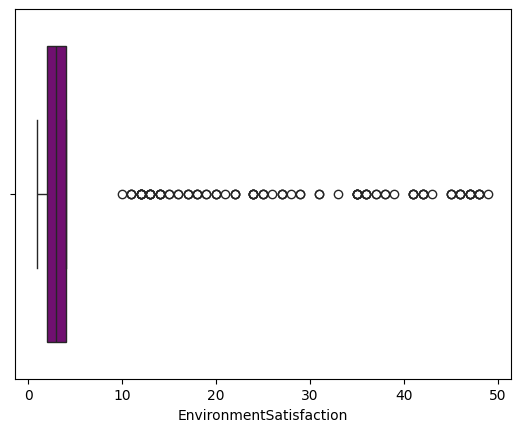

In [767]:
# Let's see how the 'EnvironmentSatisfaction' data is distributed through a boxplot. We observe that there is quite a bit of dispersion in the data.
sns.boxplot(data=df_clean,
            x='EnvironmentSatisfaction',
            color="purple");

##### To check the dispersion of the data, we review the percentage of each value in the "EnvironmentSatisfaction" column. 

In [768]:
# We obtain the percentage of data for each value.
percentage_ES= df_clean['EnvironmentSatisfaction'].value_counts(normalize=True) * 100
percentage_ES


EnvironmentSatisfaction
4     28.500620
3     28.438662
1     18.463445
2     18.401487
12     0.433705
35     0.371747
13     0.371747
14     0.309789
24     0.309789
47     0.309789
36     0.247831
48     0.247831
41     0.247831
46     0.247831
42     0.247831
45     0.185874
11     0.185874
22     0.185874
17     0.185874
18     0.185874
20     0.185874
25     0.185874
27     0.185874
37     0.123916
29     0.123916
19     0.123916
38     0.123916
31     0.123916
15     0.123916
16     0.123916
26     0.061958
39     0.061958
10     0.061958
49     0.061958
21     0.061958
28     0.061958
33     0.061958
43     0.061958
Name: proportion, dtype: float64

##### We see that the percentage of values above 4 are very small. Most of the data is between 1 and 4. Values above 4 are outliers, so we will replace them with the median to obtain a good data list.

In [769]:
#We calculate the median of 'EnvironmentSatisfaction'
mediana_EnvSat = df_clean['EnvironmentSatisfaction'].median()
mediana_EnvSat


3.0

In [770]:
# Define the median replacement function
def replace_env_satisfaction(EnvironmentSatisfaction, mediana_EnvSat):
    if EnvironmentSatisfaction > 4:
        return mediana_EnvSat
    else:
        return EnvironmentSatisfaction

#Apply the function to the 'EnvironmentSatisfaction' column to modify outliers
df_clean['EnvironmentSatisfaction'] = df_clean['EnvironmentSatisfaction'].apply(replace_env_satisfaction, mediana_EnvSat=mediana_EnvSat)
print(df_clean['EnvironmentSatisfaction'])

0       1.0
1       3.0
2       3.0
3       1.0
4       1.0
       ... 
1609    3.0
1610    3.0
1611    3.0
1612    1.0
1613    4.0
Name: EnvironmentSatisfaction, Length: 1614, dtype: float64


In [771]:
#We obtain the percentages of each value again to confirm that all the data is between 1 and 4
percentage_ES= df_clean['EnvironmentSatisfaction'].value_counts(normalize=True) * 100
percentage_ES

EnvironmentSatisfaction
3.0    34.634449
4.0    28.500620
1.0    18.463445
2.0    18.401487
Name: proportion, dtype: float64

In [772]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1183 non-null   object 
 1   Age                       1614 non-null   int64  
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            842 non-null    object 
 4   Department                302 non-null    object 
 5   DistanceFromHome          1614 non-null   int64  
 6   Education                 1614 non-null   int64  
 7   EducationField            869 non-null    object 
 8   EnvironmentSatisfaction   1614 non-null   float64
 9   Gender                    1614 non-null   object 
 10  JobInvolvement            1614 non-null   int64  
 11  JobLevel                  1614 non-null   int64  
 12  JobRole                   1614 non-null   object 
 13  JobSatisfaction           1614 non-null   int64  
 14  MaritalS

#### C) DUPLICATED HANDLING



In [790]:
# Check for duplicate rows after the homogenitazion
df_clean.duplicated().sum()

59

##### Let's review the rows with duplicate EmployeeNumber to see how to handle these duplicate rows.

In [793]:
# Show complete rows that have duplicate values in the EmployeeNumber column for further review
df_clean_order = df_clean[df_clean.duplicated(subset='EmployeeNumber', keep=False)]

# Sort the results by EmployeeNumber in ascending order
df_clean_order = df_clean_order.sort_values(by='EmployeeNumber')

# Filter out rows that have no null values in the EmployeeNumber column
df_no_nulls_employee_number = df_clean_order[df_clean_order['EmployeeNumber'].notna()]

# Display the results
df_no_nulls_employee_number




,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
987,1044.0,33,No,Non-Travel,Sales,8,1,Life Sciences,2.0,Female,2,1,Sales Representative,4,NaN,NaN,21437,0,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,1990,No
1483,1044.0,33,No,Non-Travel,Sales,8,1,Life Sciences,2.0,Female,2,1,Sales Representative,4,NaN,NaN,21437,0,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,1990,No
1484,1053.0,26,Yes,NaN,NaN,2,3,Life Sciences,1.0,Male,3,1,Research Scientist,1,Married,"2042,0",15346,6,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,1997,Yes
988,1053.0,26,Yes,NaN,NaN,2,3,Life Sciences,1.0,Male,3,1,Research Scientist,1,Married,"2042,0",15346,6,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,1997,Yes
990,1069.0,46,No,NaN,NaN,47,4,Medical,3.0,Male,3,5,Research Director,4,NaN,NaN,21445,9,No,17,"3,0",4,"80,0",2,"23,0",0,"3,0",2,NaN,2,2,1977,Yes
1486,1069.0,46,No,NaN,NaN,1,4,Medical,4.0,Male,3,5,Research Director,4,NaN,NaN,21445,9,No,17,"3,0",4,"80,0",2,"23,0",0,"3,0",2,NaN,2,2,1977,Yes
1000,1131.0,21,No,NaN,NaN,1,1,NaN,4.0,Female,2,1,Research Scientist,2,Single,"2070,0",25326,1,Yes,11,"3,0",3,"80,0",0,"2,0",6,"4,0",2,NaN,2,2,2002,Yes
1487,1131.0,21,No,NaN,NaN,25,1,NaN,4.0,Female,2,1,Research Scientist,2,Single,"2070,0",25326,1,Yes,11,"3,0",3,"80,0",0,"2,0",6,"4,0",2,NaN,2,2,2002,Yes
1001,1135.0,31,No,Travel_Frequently,NaN,20,3,NaN,3.0,Male,4,1,Sales Representative,4,Married,"2791,0",21981,0,No,12,NaN,1,NaN,1,"3,0",4,"3,0",2,NaN,2,2,1992,Yes
1488,1135.0,31,No,Travel_Frequently,NaN,20,3,NaN,3.0,Male,4,1,Sales Representative,4,Married,"2791,0",21981,0,No,12,NaN,1,NaN,1,"3,0",4,"3,0",2,NaN,2,2,1992,No


In [789]:
# Ajustar la configuración para mostrar más filas
pd.set_option('display.max_rows', None)

# Mostrar todas las filas sin valores nulos en EmployeeNumber
df_no_nulls_employee_number

,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
987,1044.0,33,No,Non-Travel,Sales,8,1,Life Sciences,2.0,Female,2,1,Sales Representative,4,NaN,NaN,21437,0,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,1990,No
1483,1044.0,33,No,Non-Travel,Sales,8,1,Life Sciences,2.0,Female,2,1,Sales Representative,4,NaN,NaN,21437,0,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,1990,No
1484,1053.0,26,Yes,NaN,NaN,2,3,Life Sciences,1.0,Male,3,1,Research Scientist,1,Married,"2042,0",15346,6,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,1997,Yes
988,1053.0,26,Yes,NaN,NaN,2,3,Life Sciences,1.0,Male,3,1,Research Scientist,1,Married,"2042,0",15346,6,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,1997,Yes
990,1069.0,46,No,NaN,NaN,47,4,Medical,3.0,Male,3,5,Research Director,4,NaN,NaN,21445,9,No,17,"3,0",4,"80,0",2,"23,0",0,"3,0",2,NaN,2,2,1977,Yes
1486,1069.0,46,No,NaN,NaN,1,4,Medical,4.0,Male,3,5,Research Director,4,NaN,NaN,21445,9,No,17,"3,0",4,"80,0",2,"23,0",0,"3,0",2,NaN,2,2,1977,Yes
1000,1131.0,21,No,NaN,NaN,1,1,NaN,4.0,Female,2,1,Research Scientist,2,Single,"2070,0",25326,1,Yes,11,"3,0",3,"80,0",0,"2,0",6,"4,0",2,NaN,2,2,2002,Yes
1487,1131.0,21,No,NaN,NaN,25,1,NaN,4.0,Female,2,1,Research Scientist,2,Single,"2070,0",25326,1,Yes,11,"3,0",3,"80,0",0,"2,0",6,"4,0",2,NaN,2,2,2002,Yes
1001,1135.0,31,No,Travel_Frequently,NaN,20,3,NaN,3.0,Male,4,1,Sales Representative,4,Married,"2791,0",21981,0,No,12,NaN,1,NaN,1,"3,0",4,"3,0",2,NaN,2,2,1992,Yes
1488,1135.0,31,No,Travel_Frequently,NaN,20,3,NaN,3.0,Male,4,1,Sales Representative,4,Married,"2791,0",21981,0,No,12,NaN,1,NaN,1,"3,0",4,"3,0",2,NaN,2,2,1992,No


#### D) NULL HANDLING


In [699]:
df_clean.isnull().sum()[df_clean.isnull().sum()>0]

EmployeeNumber         431
BusinessTravel         772
Department            1312
EducationField         745
MaritalStatus          651
MonthlyIncome          843
OverTime               676
PerformanceRating      195
StandardHours         1195
TotalWorkingYears      526
WorkLifeBalance        108
YearsInCurrentRole    1580
dtype: int64

##### Revisamos los datos nulos de Employeenumber:

In [700]:
# Total nulls in column 'MaritalStatus'
percent_null_mstatus = (df_employees['MaritalStatus'].isna().sum() / len(df_employees)) * 100

print(f'The column "MaritalStatus" has {df_employees["MaritalStatus"].isnull().sum()} null values, wich represents a {percent_null_mstatus.round()} %.')


The column "MaritalStatus" has 651 null values, wich represents a 40.0 %.


In [701]:
valores_nulosEN = df_clean['EmployeeNumber'].isnull().sum()
valores_nulosEN

431

In [702]:
# Since we are not going to delete the column because of the null values, we replace the nulls with ‘Unknown’
df_clean['EmployeeNumber'] = df_clean['EmployeeNumber'].fillna('Unknown')
df_clean['EmployeeNumber']

0         162.0
1         259.0
2         319.0
3       Unknown
4       Unknown
         ...   
1609      967.0
1610      972.0
1611    Unknown
1612      990.0
1613    Unknown
Name: EmployeeNumber, Length: 1614, dtype: object

##### Since we are not going to delete the column for the null values, we replace the nulls with ‘Unknown’:

In [703]:
# Modification of null data by unknown in 'Deparment'.
df_clean['Department'] = df_clean['Department'].fillna('Unknown')
df_clean['Department']

0                        Unknown
1                        Unknown
2        Research & Development 
3                        Unknown
4                        Unknown
                  ...           
1609                     Unknown
1610                     Unknown
1611                     Unknown
1612                     Unknown
1613                     Unknown
Name: Department, Length: 1614, dtype: object

In [704]:
df_clean.isna().sum()[df_clean.isna().sum()>0]

BusinessTravel         772
EducationField         745
MaritalStatus          651
MonthlyIncome          843
OverTime               676
PerformanceRating      195
StandardHours         1195
TotalWorkingYears      526
WorkLifeBalance        108
YearsInCurrentRole    1580
dtype: int64